In [1]:
import numpy as np

# Q1 (c)

In [7]:
four_room_space = np.array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                            [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

empty_cells = np.where(four_room_space == 0.0)
state_space = [[col, 10 - row] for row, col in zip(empty_cells[0], empty_cells[1])]

In [68]:
table_row_count = 1
actions = {"UP": np.array([1, 0]), 
           "RIGHT": np.array([0, 1]), 
           "DOWN": np.array([-1, 0]), 
           "LEFT": np.array([0, -1])}
action_keys = list(actions.keys())


# print table header
print(f"""{"#": <5} | {"s": <8} | {"a": <5} | {"s'": <8} | r | p""")

for row in range(11):
    for col in range(11):

        # continue if state is a wall
        if [row, col] not in state_space:
            continue
        
        s = f"({row}, {col})"

        for i, a in enumerate(action_keys):

            # any action from the goal cell sends you back to beginning and gives reward 1
            if (row == 10) & (col == 10):
                print(f"{table_row_count: <5} | {s: <8} | {a: <5} | {'(0, 0)': <8} | 1 | 1")
                table_row_count += 1
                continue

            # keep count of % chance next state is the same as current state
            same_state_chance = 0

            # 80% chance of desired action
            desired_state = list(np.array([row, col]) + actions[a])
            if desired_state in state_space:
                desired_state = f"({desired_state[0]}, {desired_state[1]})"
                print(f"{table_row_count: <5} | {s: <8} | {a: <5} | {desired_state: <8} | 0 | 0.8")
                table_row_count += 1
            else:
                same_state_chance += 0.8

            # 10% chance of taking action 90 deg to the right of desired action
            state_right = list(np.array([row, col]) + actions[action_keys[(i+1)%4]])
            if state_right in state_space:
                state_right = f"({state_right[0]}, {state_right[1]})"
                print(f"{table_row_count: <5} | {s: <8} | {a: <5} | {state_right: <8} | 0 | 0.1")
                table_row_count += 1
            else:
                same_state_chance += 0.1

            # 10% chance of taking action 90 deg to the left of desired action
            state_left = list(np.array([row, col]) + actions[action_keys[i-1]])
            if state_left in state_space:
                state_left = f"({state_left[0]}, {state_left[1]})"
                print(f"{table_row_count: <5} | {s: <8} | {a: <5} | {state_left: <8} | 0 | 0.1")
                table_row_count += 1
            else:
                same_state_chance += 0.1
            

            if same_state_chance > 0:
                print(f"{table_row_count: <5} | {s: <8} | {a: <5} | {s: <8} | 0 | {same_state_chance}")
                table_row_count += 1
            

#     | s        | a     | s'       | r | p
1     | (0, 0)   | UP    | (1, 0)   | 0 | 0.8
2     | (0, 0)   | UP    | (0, 1)   | 0 | 0.1
3     | (0, 0)   | UP    | (0, 0)   | 0 | 0.1
4     | (0, 0)   | RIGHT | (0, 1)   | 0 | 0.8
5     | (0, 0)   | RIGHT | (1, 0)   | 0 | 0.1
6     | (0, 0)   | RIGHT | (0, 0)   | 0 | 0.1
7     | (0, 0)   | DOWN  | (0, 1)   | 0 | 0.1
8     | (0, 0)   | DOWN  | (0, 0)   | 0 | 0.9
9     | (0, 0)   | LEFT  | (1, 0)   | 0 | 0.1
10    | (0, 0)   | LEFT  | (0, 0)   | 0 | 0.9
11    | (0, 1)   | UP    | (1, 1)   | 0 | 0.8
12    | (0, 1)   | UP    | (0, 2)   | 0 | 0.1
13    | (0, 1)   | UP    | (0, 0)   | 0 | 0.1
14    | (0, 1)   | RIGHT | (0, 2)   | 0 | 0.8
15    | (0, 1)   | RIGHT | (1, 1)   | 0 | 0.1
16    | (0, 1)   | RIGHT | (0, 1)   | 0 | 0.1
17    | (0, 1)   | DOWN  | (0, 0)   | 0 | 0.1
18    | (0, 1)   | DOWN  | (0, 2)   | 0 | 0.1
19    | (0, 1)   | DOWN  | (0, 1)   | 0 | 0.8
20    | (0, 1)   | LEFT  | (0, 0)   | 0 | 0.8
21    | (0, 1)   | LEFT  | (1, 1)   

# Q6 (c)

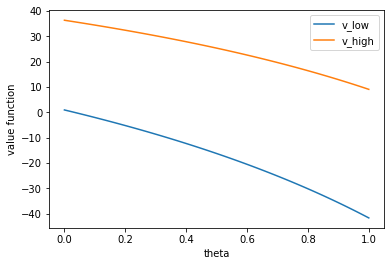

In [49]:
import matplotlib.pyplot as plt

theta = np.arange(0, 1.01, 0.01)
v_low = (89.9*theta - 2.78)/(theta-3.09)
v_high = 35.7 + 0.64*v_low

fig, ax = plt.subplots(facecolor='w')
ax.plot(theta, v_low)
ax.plot(theta, v_high)

ax.set_xlabel('theta')
ax.set_ylabel('value function')
ax.legend(['v_low', 'v_high'])